In [5]:
#all essential library
import pandas as pd
import numpy as np

# IMPORTING THE DATASETS

In [6]:
survey_raw_df = pd.read_csv("survey_results_public.csv")

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [8]:
schema_fname = "survey_results_schema.csv"

# DATA PREPARATION!

In [9]:
schema_raw = pd.read_csv(schema_fname, index_col = "Column").QuestionText
### Converting the csv into series


In [10]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [11]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [12]:
selected_columns = [
# Demographics
'Country',
'Age',
'Gender',
'EdLevel',
'UndergradMajor',
# Programming experience
'Hobbyist',
'Age1stCode',
'YearsCode',
'YearsCodePro',
'LanguageWorkedWith',
'LanguageDesireNextYear',
'NEWLearn',
'NEWStuck',
# Employment
'Employment',
'DevType',
'WorkWeekHrs',
'JobSat',
'JobFactors',
'NEWOvertime',
'NEWEdImpt'
]

In [13]:
schema = schema_raw[selected_columns]
print(schema)


Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [14]:
len(selected_columns)

20

In [15]:
survey_df = survey_raw_df[selected_columns].copy()

In [16]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
survey_df.shape

(64461, 20)

In [18]:
schema.shape

(20,)

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [20]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [21]:
survey_df.Age.unique()

array([  nan,  25. ,  31. ,  36. ,  30. ,  22. ,  23. ,  49. ,  53. ,
        27. ,  45. ,  32. ,  24. ,  40. ,  18. ,  39. ,  29. ,  16. ,
        34. ,  19. ,  35. ,  20. ,  38. ,  57. ,  28. ,  17. ,  44. ,
        21. ,  48. ,  26. ,  42. ,  55. ,  37. ,  50. ,  41. ,  64. ,
        63. ,  33. ,  43. ,  51. ,  60. ,  59. ,  62. ,  69. ,  52. ,
        46. ,  49.5,  56. ,  47. ,  15. ,  72. ,  13. ,  71. ,  54. ,
        70. ,  11. ,  14. ,  61. ,  26.8,  86. ,  58. ,  67. ,  94. ,
        65. ,  66. ,  84. ,  73. ,  78. ,  68. ,  99. ,  74. ,  12. ,
        77. ,  15.5,  85. ,  76. ,  35.7,  32.5,  81. ,  23.8,  97. ,
        96. ,  26.5,   3. ,  24.5,  14.7,  34.5,   5. ,   1. ,  20.5,
        79. , 279. ,  22.5,  27.5,  32.8,  10. ,  89. ,  80. ,  98. ,
        19.8,   7. ,  21.5,  31.5,  88. ,  39.5,  16.5,  75. ,  83. ,
        23.4,  95. ,  14.5])

In [22]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [23]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [24]:
survey_df.Age1stCode = pd.to_numeric(survey_df.Age1stCode,errors = 'coerce')
survey_df.YearsCode = pd.to_numeric(survey_df.YearsCode,errors = 'coerce')
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro,errors = 'coerce')
survey_df.Age = pd.to_numeric(survey_df.Age,errors = 'coerce')

In [25]:
survey_df.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36., 54.,
       48., 56., 45., 44., 34., 39., 51., 68., 50., 37., 47., 43., 52.,
       85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

In [26]:
survey_df.Age.unique()

array([  nan,  25. ,  31. ,  36. ,  30. ,  22. ,  23. ,  49. ,  53. ,
        27. ,  45. ,  32. ,  24. ,  40. ,  18. ,  39. ,  29. ,  16. ,
        34. ,  19. ,  35. ,  20. ,  38. ,  57. ,  28. ,  17. ,  44. ,
        21. ,  48. ,  26. ,  42. ,  55. ,  37. ,  50. ,  41. ,  64. ,
        63. ,  33. ,  43. ,  51. ,  60. ,  59. ,  62. ,  69. ,  52. ,
        46. ,  49.5,  56. ,  47. ,  15. ,  72. ,  13. ,  71. ,  54. ,
        70. ,  11. ,  14. ,  61. ,  26.8,  86. ,  58. ,  67. ,  94. ,
        65. ,  66. ,  84. ,  73. ,  78. ,  68. ,  99. ,  74. ,  12. ,
        77. ,  15.5,  85. ,  76. ,  35.7,  32.5,  81. ,  23.8,  97. ,
        96. ,  26.5,   3. ,  24.5,  14.7,  34.5,   5. ,   1. ,  20.5,
        79. , 279. ,  22.5,  27.5,  32.8,  10. ,  89. ,  80. ,  98. ,
        19.8,   7. ,  21.5,  31.5,  88. ,  39.5,  16.5,  75. ,  83. ,
        23.4,  95. ,  14.5])

In [27]:
survey_df.YearsCode.unique()

array([36.,  7.,  4., 15.,  6., 17.,  8., 10., 35.,  5., 37., 19.,  9.,
       22., 30., 23., 20.,  2., nan,  3., 13., 25., 16., 43., 11., 38.,
       33., 24., 21., 12., 40., 27., 50., 46., 14., 18., 28., 32., 44.,
       26., 42., 31., 34., 29.,  1., 39., 41., 45., 47., 49., 48.])

In [28]:
survey_df.YearsCodePro.unique()

array([27.,  4., nan,  8., 13.,  2.,  7., 20.,  1., 23.,  3., 12., 17.,
       18., 10., 14., 29.,  6., 28.,  9., 15., 11., 16., 25.,  5., 21.,
       19., 35., 24., 32., 22., 30., 38., 26., 40., 33., 31., 34., 36.,
       39., 37., 41., 45., 47., 42., 46., 50., 43., 44., 48., 49.])

In [29]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [30]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [31]:
survey_df.drop(survey_df[survey_df.Age < 10].index,inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index,inplace = True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index,inplace = True)

In [32]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [33]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [34]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [35]:
survey_df.where(~(survey_df.Gender.str.contains(';',na = False)),np.nan,inplace = True)

In [36]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [37]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64306 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63606 non-null  object 
 1   Age                     45068 non-null  float64
 2   Gender                  50115 non-null  object 
 3   EdLevel                 56981 non-null  object 
 4   UndergradMajor          50619 non-null  object 
 5   Hobbyist                63950 non-null  object 
 6   Age1stCode              57027 non-null  float64
 7   YearsCode               56339 non-null  float64
 8   YearsCodePro            43794 non-null  float64
 9   LanguageWorkedWith      56932 non-null  object 
 10  LanguageDesireNextYear  53688 non-null  object 
 11  NEWLearn                55730 non-null  object 
 12  NEWStuck                54537 non-null  object 
 13  Employment              63394 non-null  object 
 14  DevType                 48983 non-null

In [38]:

survey_df.Age = survey_df.Age.round()


In [39]:
survey_df.sample(20)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
37021,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,No,20.0,5.0,3.0,JavaScript;Rust;TypeScript,NaN,Once a year,NaN,Employed full-time,"Developer, front-end;Developer, full-stack",40.0,Slightly dissatisfied,NaN,Sometimes: 1-2 days per month but less than we...,Fairly important
43687,United States,NaN,NaN,I never completed any formal education,NaN,Yes,52.0,4.0,5.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,Every few months,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,Very satisfied,NaN,NaN,NaN
24759,United States,39.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,15.0,25.0,10.0,HTML/CSS;JavaScript;Ruby;TypeScript,JavaScript;Rust;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
11566,Turkey,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,6.0,2.0,HTML/CSS;Java;JavaScript;Python,Go;HTML/CSS;Java;JavaScript;Kotlin;Python,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
19646,United States,31.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,13.0,3.0,1.0,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;Python;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",45.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Fairly important
57655,United States,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,8.0,6.0,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python;Rust;SQL,Once a year,Watch help / tutorial videos;Do other work and...,Employed full-time,"Developer, full-stack;Engineering manager;Prod...",50.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Often: 1-2 days per week or more,Somewhat important
62097,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,21.0,19.0,17.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, desktop or ente...",44.0,Neither satisfied nor dissatisfied,NaN,Sometimes: 1-2 days per month but less than we...,Fairly important
45595,United States,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,18.0,7.0,2.0,Java,Go;JavaScript;Scala,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",37.0,Slightly dissatisfied,Flex time or a flexible schedule;Specific depa...,Sometimes: 1-2 days per month but less than we...,Critically important
20689,India,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,20.0,12.0,7.0,C#;Java,C#;Dart;Java;Kotlin,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, mobile",45.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Very important
20661,Germany,23.0,Man,"Associat

# EDA & VIZ

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00057647'


In [43]:
 '''Lets look at the number of countries from which there are responses in the survey, and plot the 10
countries with the highest number of responses'''
    
schema.Country

'Where do you live?'

In [44]:
survey_df.Country.nunique()

183

In [45]:
top_countries = survey_df.Country.value_counts().head(20)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Turkey                  771
Israel                  649
Switzerland             628
Romania                 596
Bangladesh              595
Name: Country, dtype: int64

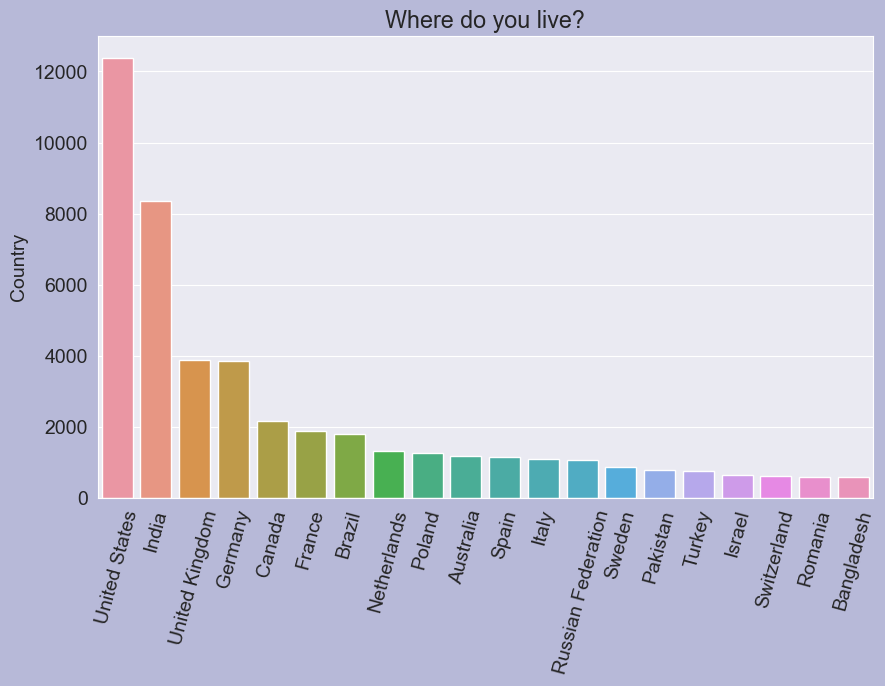

In [72]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);


In [47]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [48]:
survey_df.Age.unique()

array([nan, 25., 31., 36., 30., 22., 23., 49., 53., 27., 45., 32., 24.,
       40., 18., 39., 29., 16., 34., 19., 35., 20., 38., 57., 28., 17.,
       44., 21., 48., 26., 42., 55., 37., 50., 41., 64., 63., 33., 43.,
       51., 60., 59., 62., 69., 52., 46., 56., 47., 15., 72., 13., 71.,
       54., 70., 11., 14., 61., 86., 58., 67., 94., 65., 66., 84., 73.,
       78., 68., 99., 74., 12., 77., 85., 76., 81., 97., 96., 79., 89.,
       80., 98., 10., 88., 75., 83., 95.])

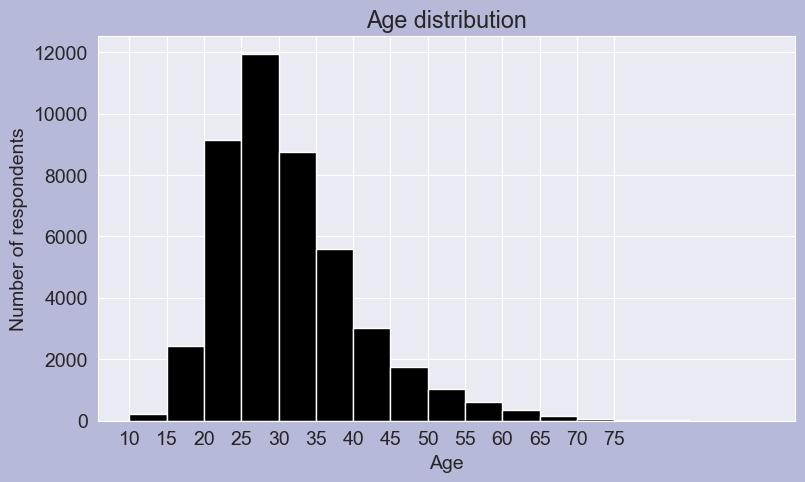

<Figure size 1400x600 with 0 Axes>

In [71]:
plt.title("Age distribution")
plt.xlabel('Age')
plt.xticks(np.arange(10, 80, 5))
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins =np.arange(10,100,5), color = "black")
plt.figure(figsize=(14,6))
matplotlib.rcParams['font.size'] = 14;

In [53]:
gender_counts = survey_df.Gender.value_counts(dropna = False)
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

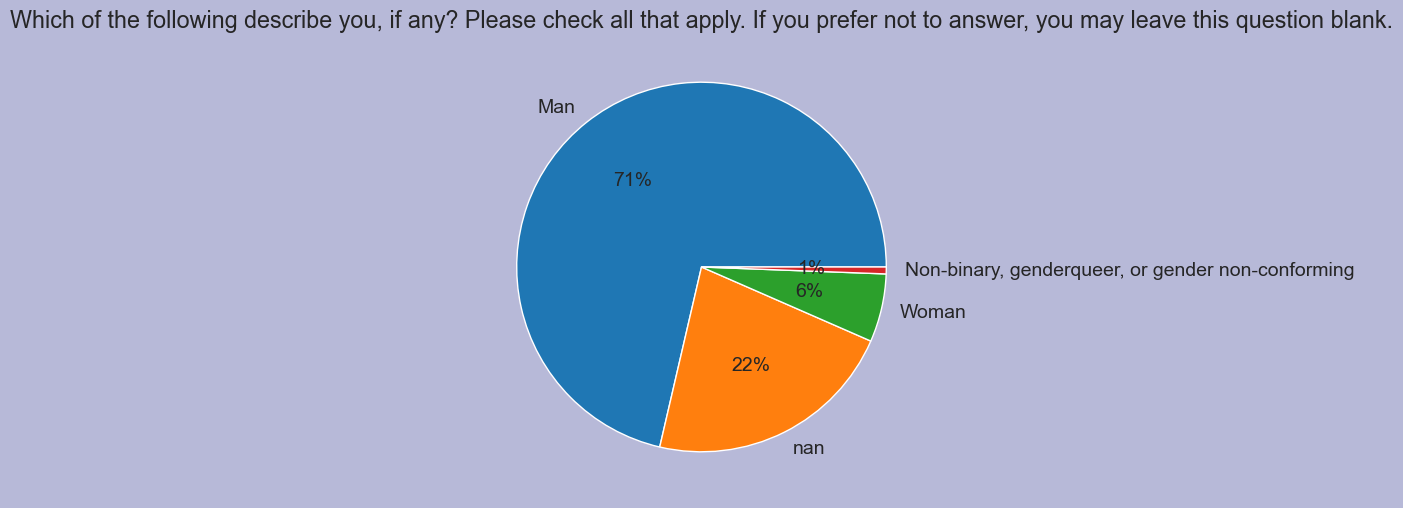

In [70]:
plt.figure(figsize =(12,6))
plt.title(schema.Gender)

plt.pie(gender_counts, labels = gender_counts.index, autopct ='%1.0f%%');

In [63]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [95]:
survey_df['EdLevel'].value_counts()


Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

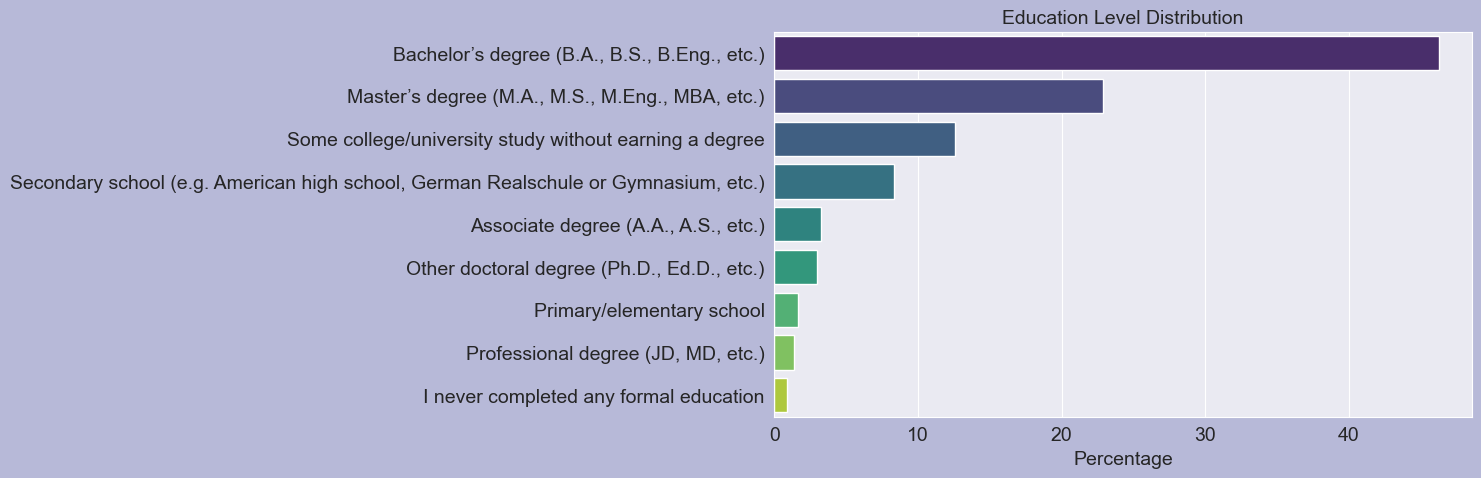

In [92]:
edlevel_percentages = survey_df.EdLevel.value_counts(normalize=True) * 100

sns.barplot(y=edlevel_percentages.index, x=edlevel_percentages.values, palette="viridis")

plt.title("Education Level Distribution", fontsize=14)
plt.xlabel("Percentage")
plt.ylabel(None)
plt.show()


In [93]:
schema.UndergradMajor

'What was your primary field of study?'

In [101]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

In [109]:
ugm = survey_df.UndergradMajor.value_counts()* 100/ survey_df.UndergradMajor.count()
ugm

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

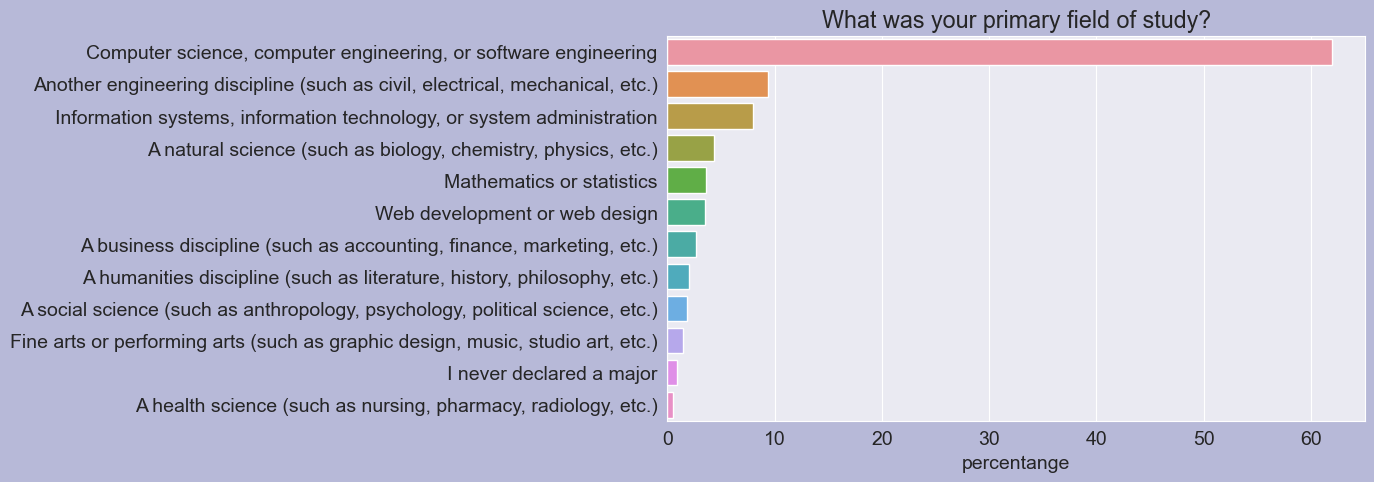

In [113]:
sns.barplot(x=ugm, y=ugm.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel("percentange");

In [114]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [122]:
edimpt = survey_df.NEWEdImpt.value_counts()

In [123]:
edimpt

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

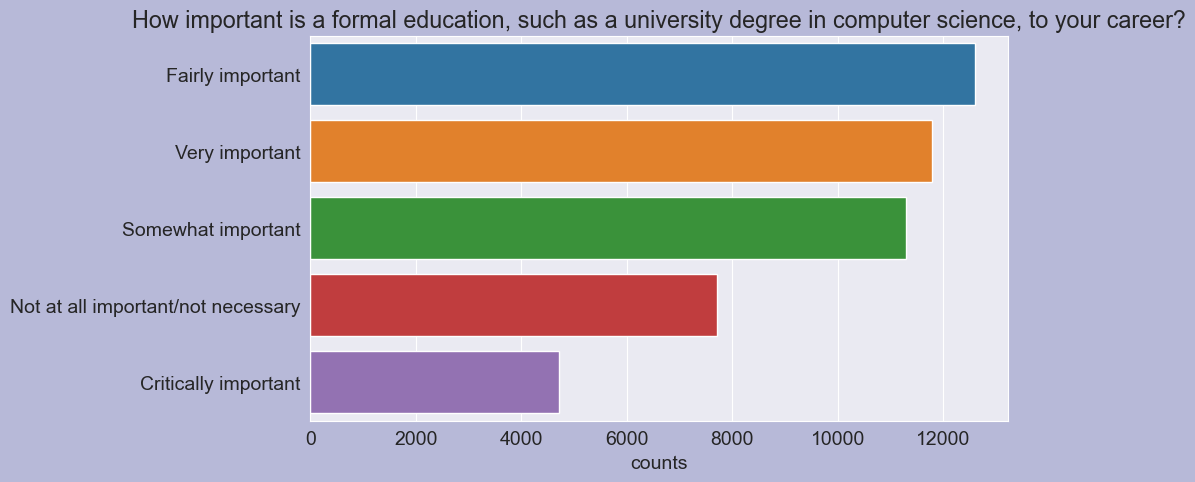

In [125]:
sns.barplot(x=edimpt, y=edimpt.index)
plt.title(schema.NEWEdImpt)
plt.ylabel(None);
plt.xlabel("counts");

In [126]:
schema.Employment

'Which of the following best describes your current employment status?'

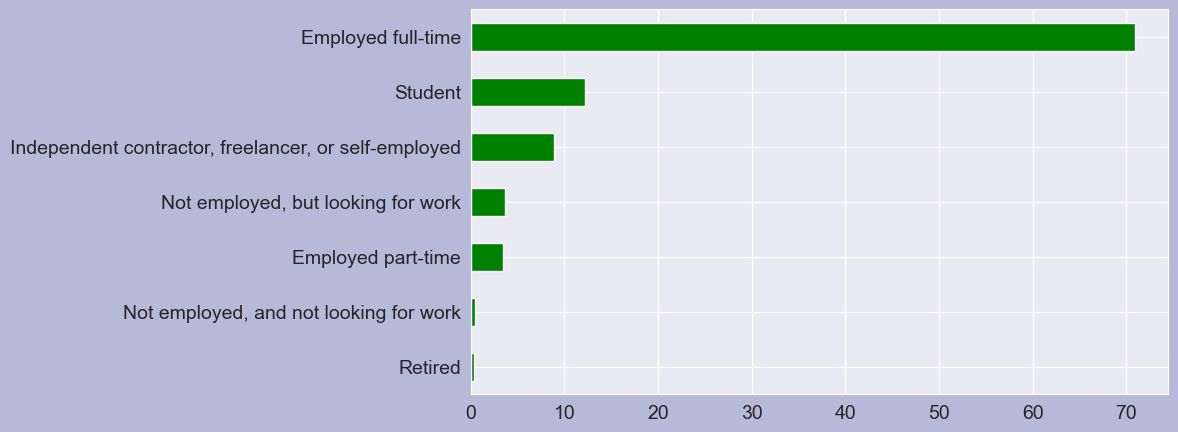

In [146]:
(survey_df.Employment.value_counts(normalize = True,ascending = True)*100).plot(kind ='barh',color = "g");

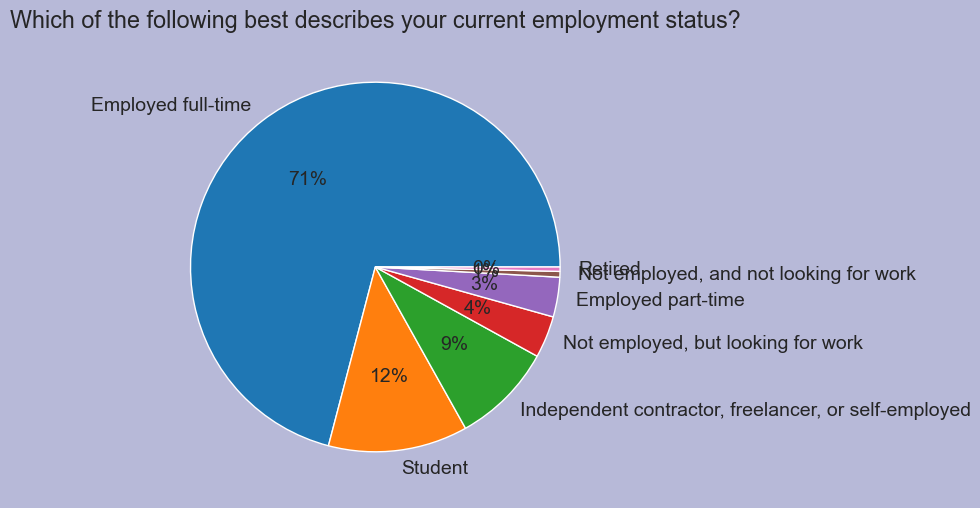